<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Pandas Review


---

### Pandas Cheat Sheet : 

Here's a cheatsheet that covers all the important Pandas operations you could use to Clean/Wrangle/Munge Data frames.

   [Pandas cheat sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) 

---

### Exploratory Data Analysis (EDA)

---

This exercise is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This exercise includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

--- 



#### Package imports

In [58]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file using Pandas .read_csv() function

In [6]:
# you may need to change this depending on your own directory locations
sat_filepath = '~nvr/desktop/dsi-sf-7-materials/datasets/state_sat_scores/sat_scores.csv'

### 1.2 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [7]:
sat = pd.read_csv(sat_filepath)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [9]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [11]:
sat.shape

(52, 4)

In [10]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
State     52 non-null object
Rate      52 non-null int64
Verbal    52 non-null int64
Math      52 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.7+ KB


In [23]:
data_dict =         {
            "State": {"type": sat.State.dtypes,
            "Description": "state id"},
            "Rate": {
            "Type": sat.Rate.dtypes, 
            "Description": "percent of students who took the SAT"
                    },       
            "Math" : {"type": sat.Math.dtype}               
                    }
                    
     


In [24]:
#The data dictionary should look something like this
data_dict

{'Math': {'type': dtype('int64')},
 'Rate': {'Description': 'percent of students who took the SAT',
  'Type': dtype('int64')},
 'State': {'Description': 'state id', 'type': dtype('O')}}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

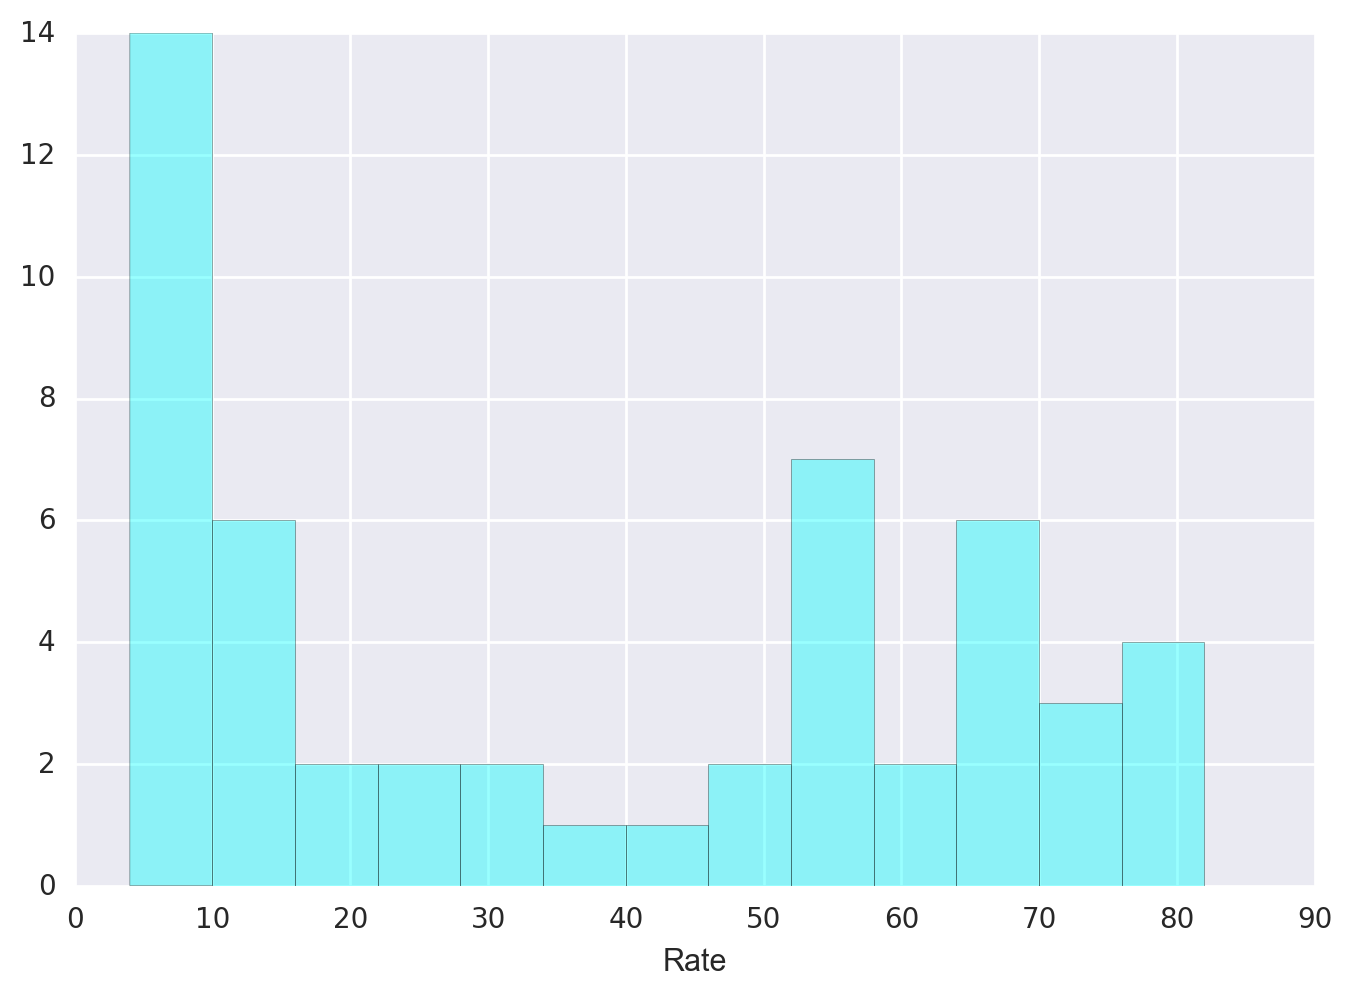

In [48]:

import seaborn as sns 

sns.distplot(sat.Rate, bins =13, kde=False, color = "aqua")

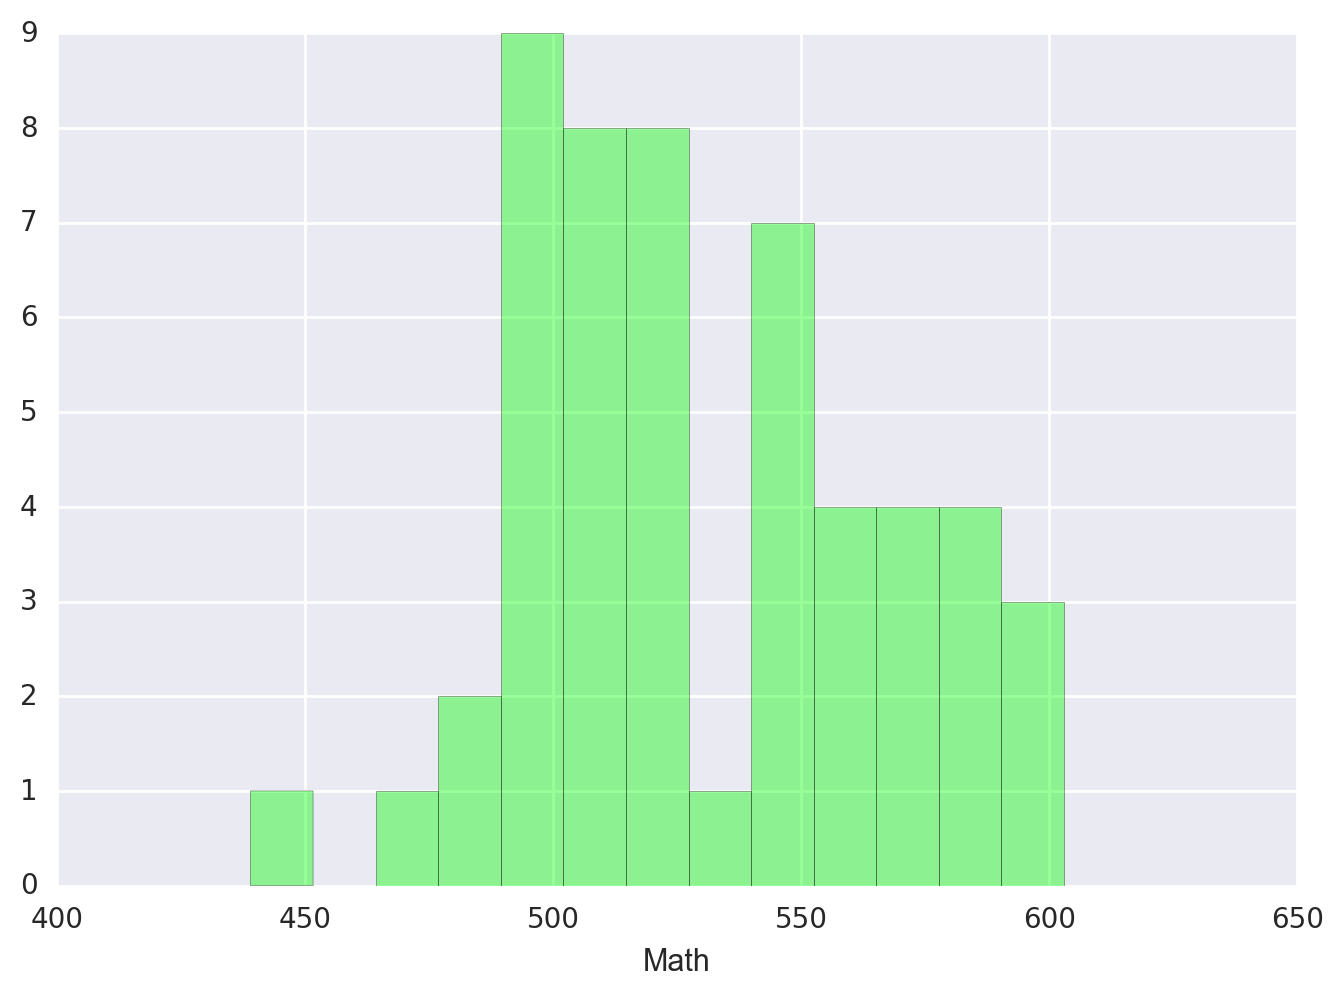

In [38]:
sns.distplot(sat.Math, bins =13, kde=False, color = "lime")

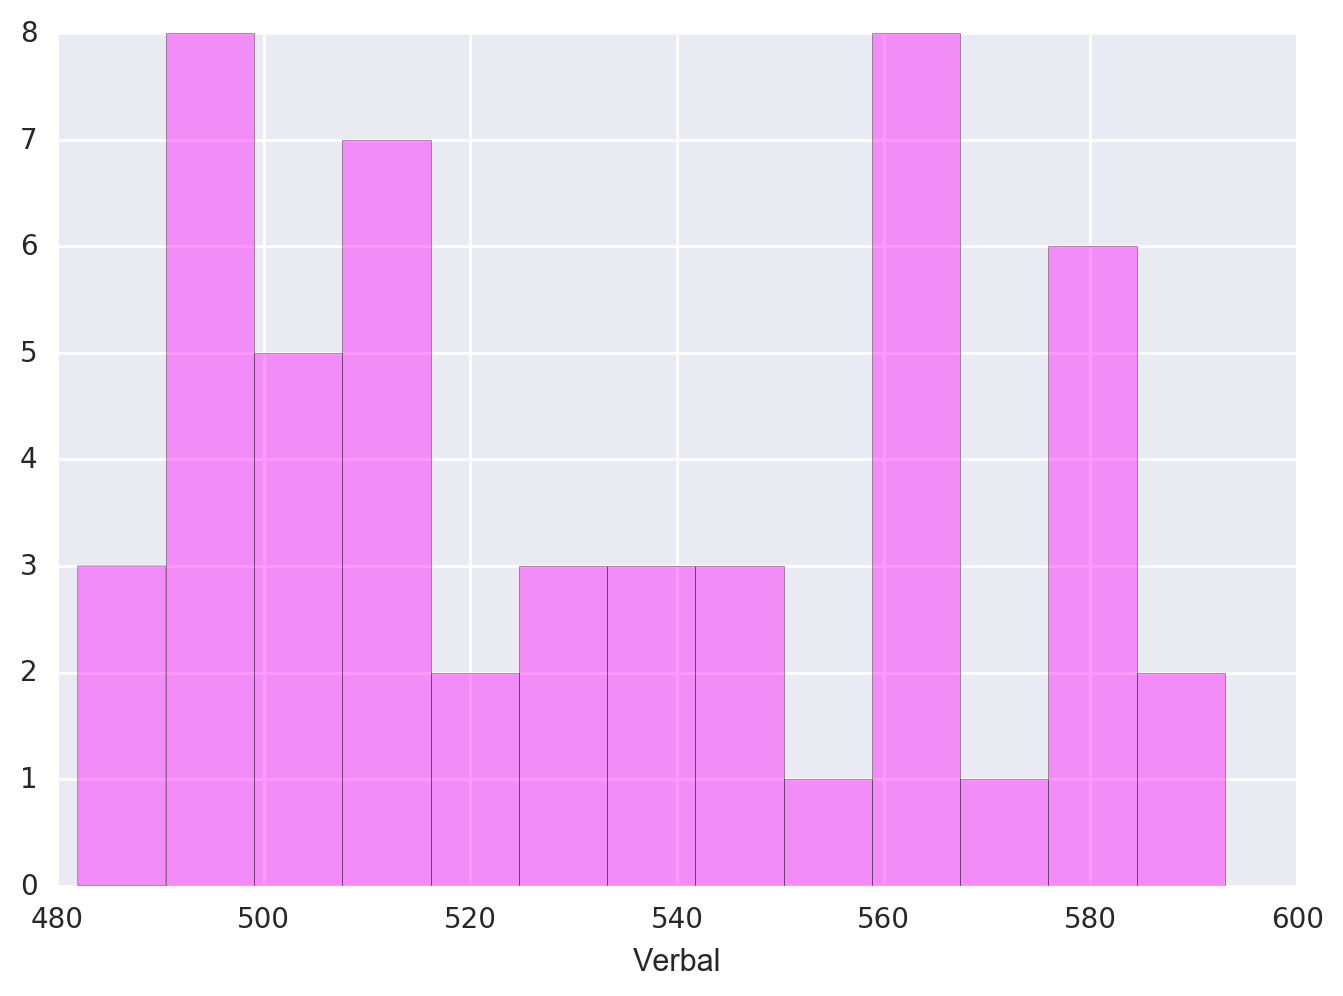

In [40]:
sns.distplot(sat.Verbal, bins =13, kde=False, color = "magenta")

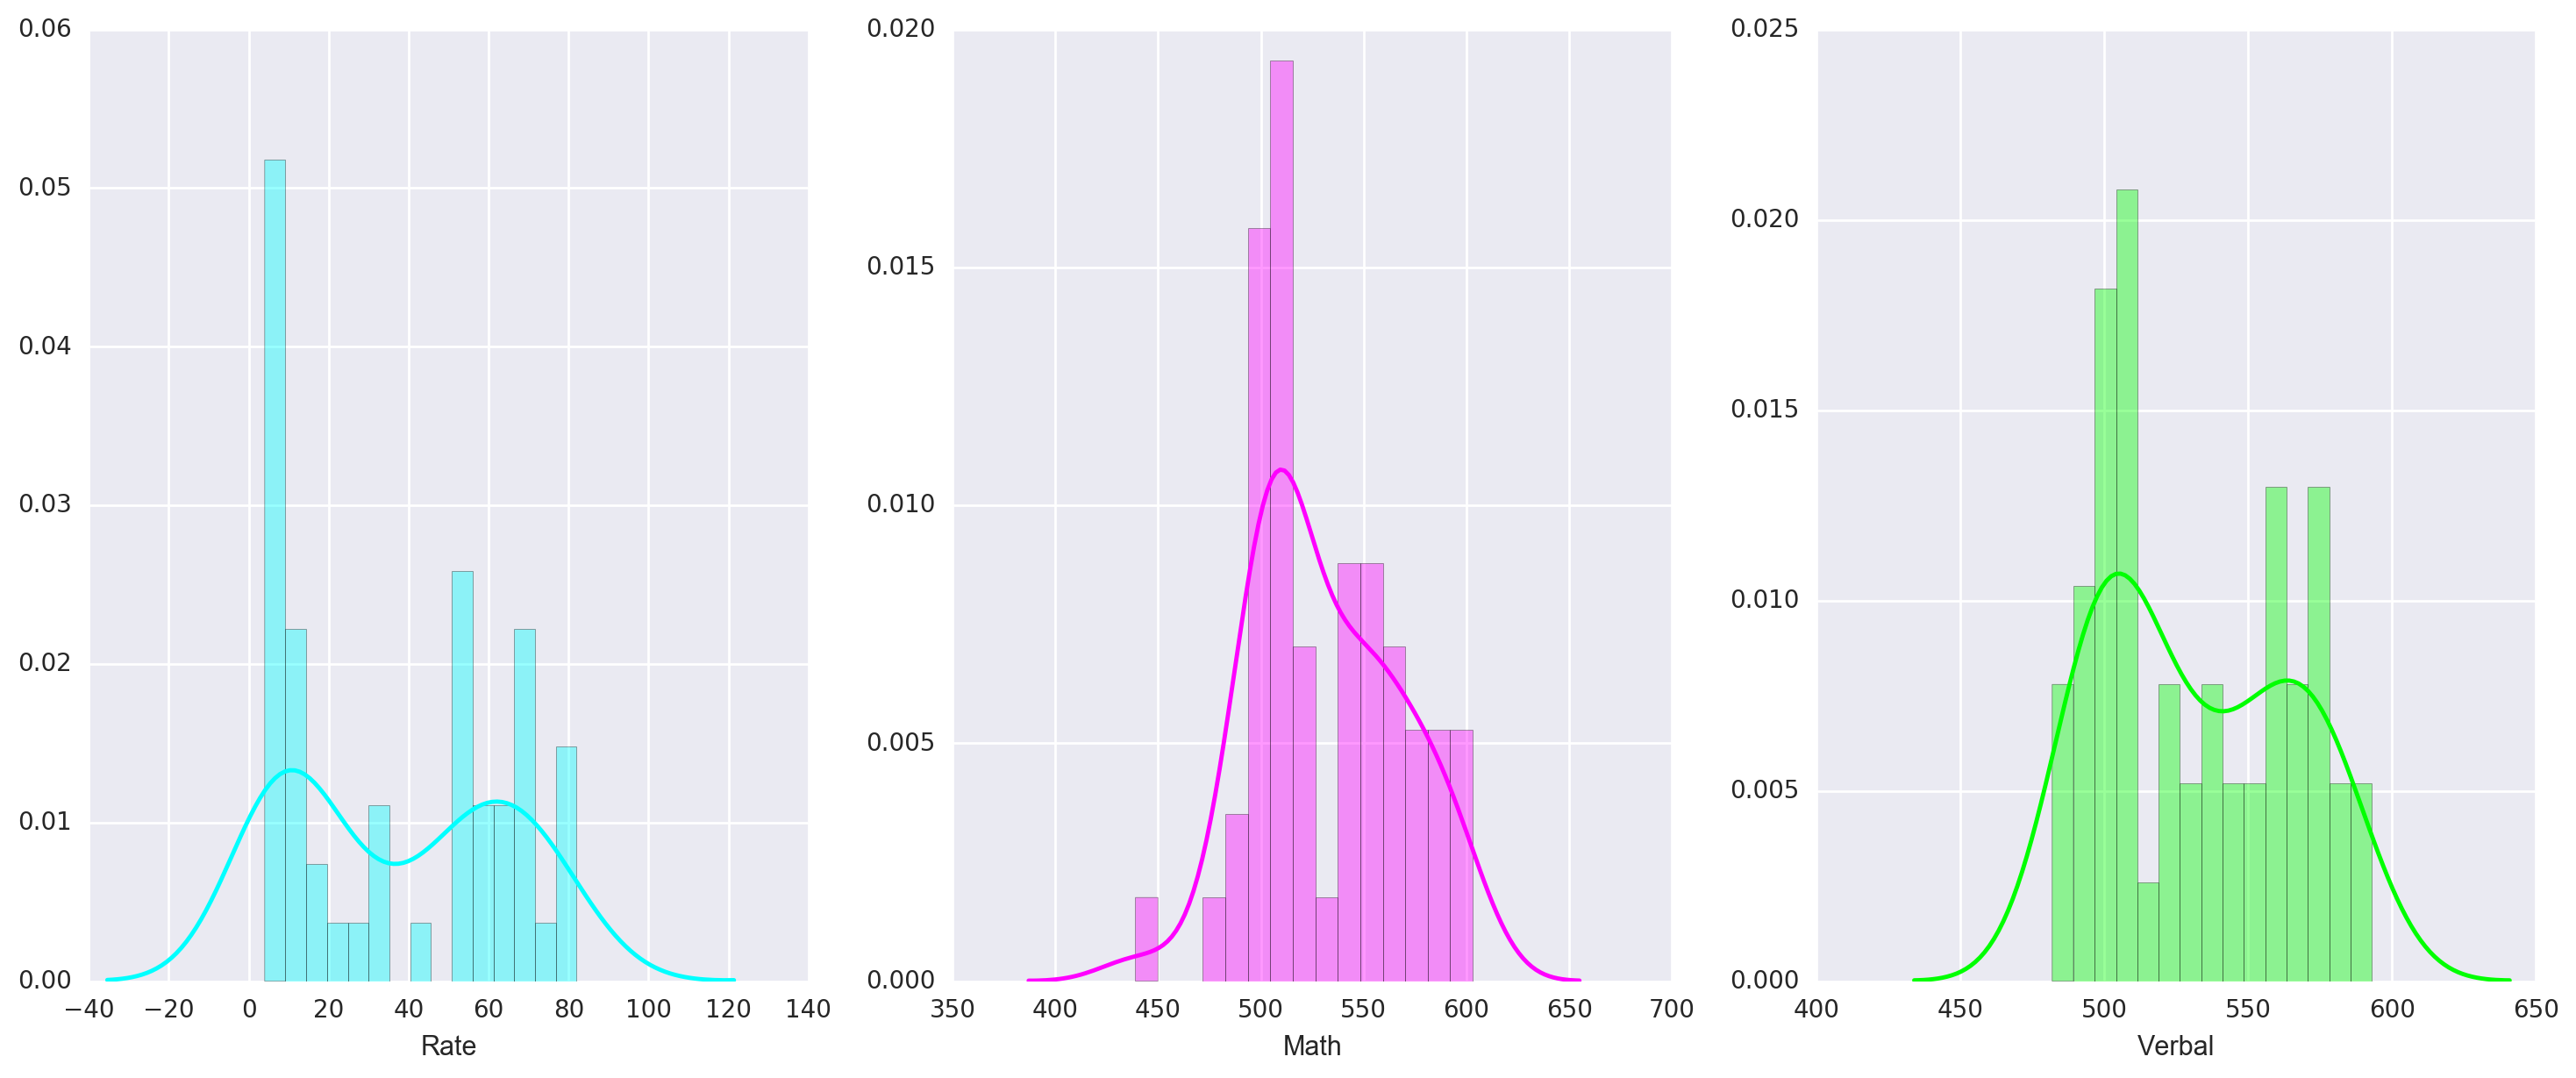

In [68]:
import seaborn as sns
fig, axarr = plt.subplots(1,3, figsize= (18,7))
axarr[0] = sns.distplot(sat.Rate, kde=True, color="aqua", bins = 15, ax=axarr[0])
axarr[1] = sns.distplot(sat.Math, kde=True, color="Magenta", bins = 15, ax=axarr[1])
axarr[2] = sns.distplot(sat.Verbal, kde=True, color="lime", bins = 15, ax=axarr[2])

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

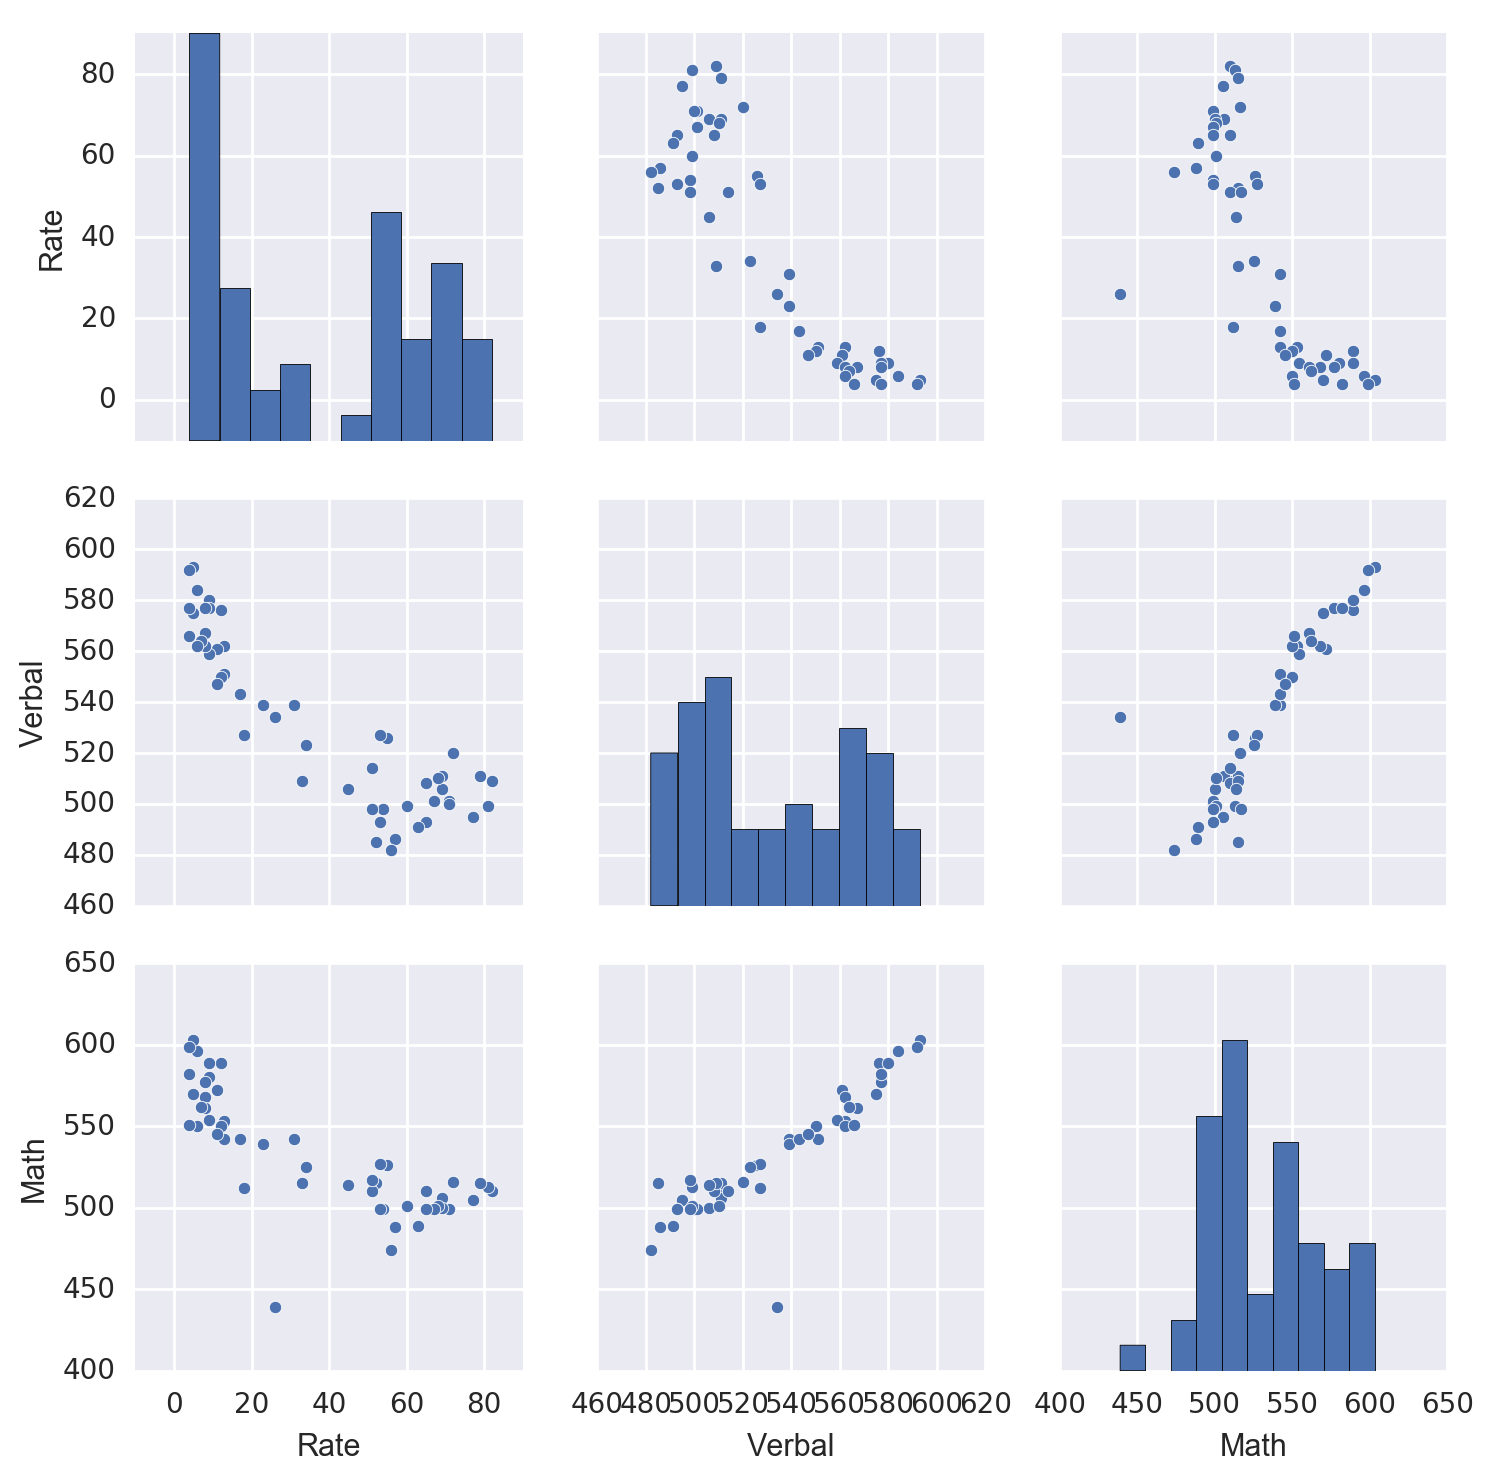

In [69]:
sns.pairplot(sat, markers="o")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a432ad0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12f2f2490>]], dtype=object)

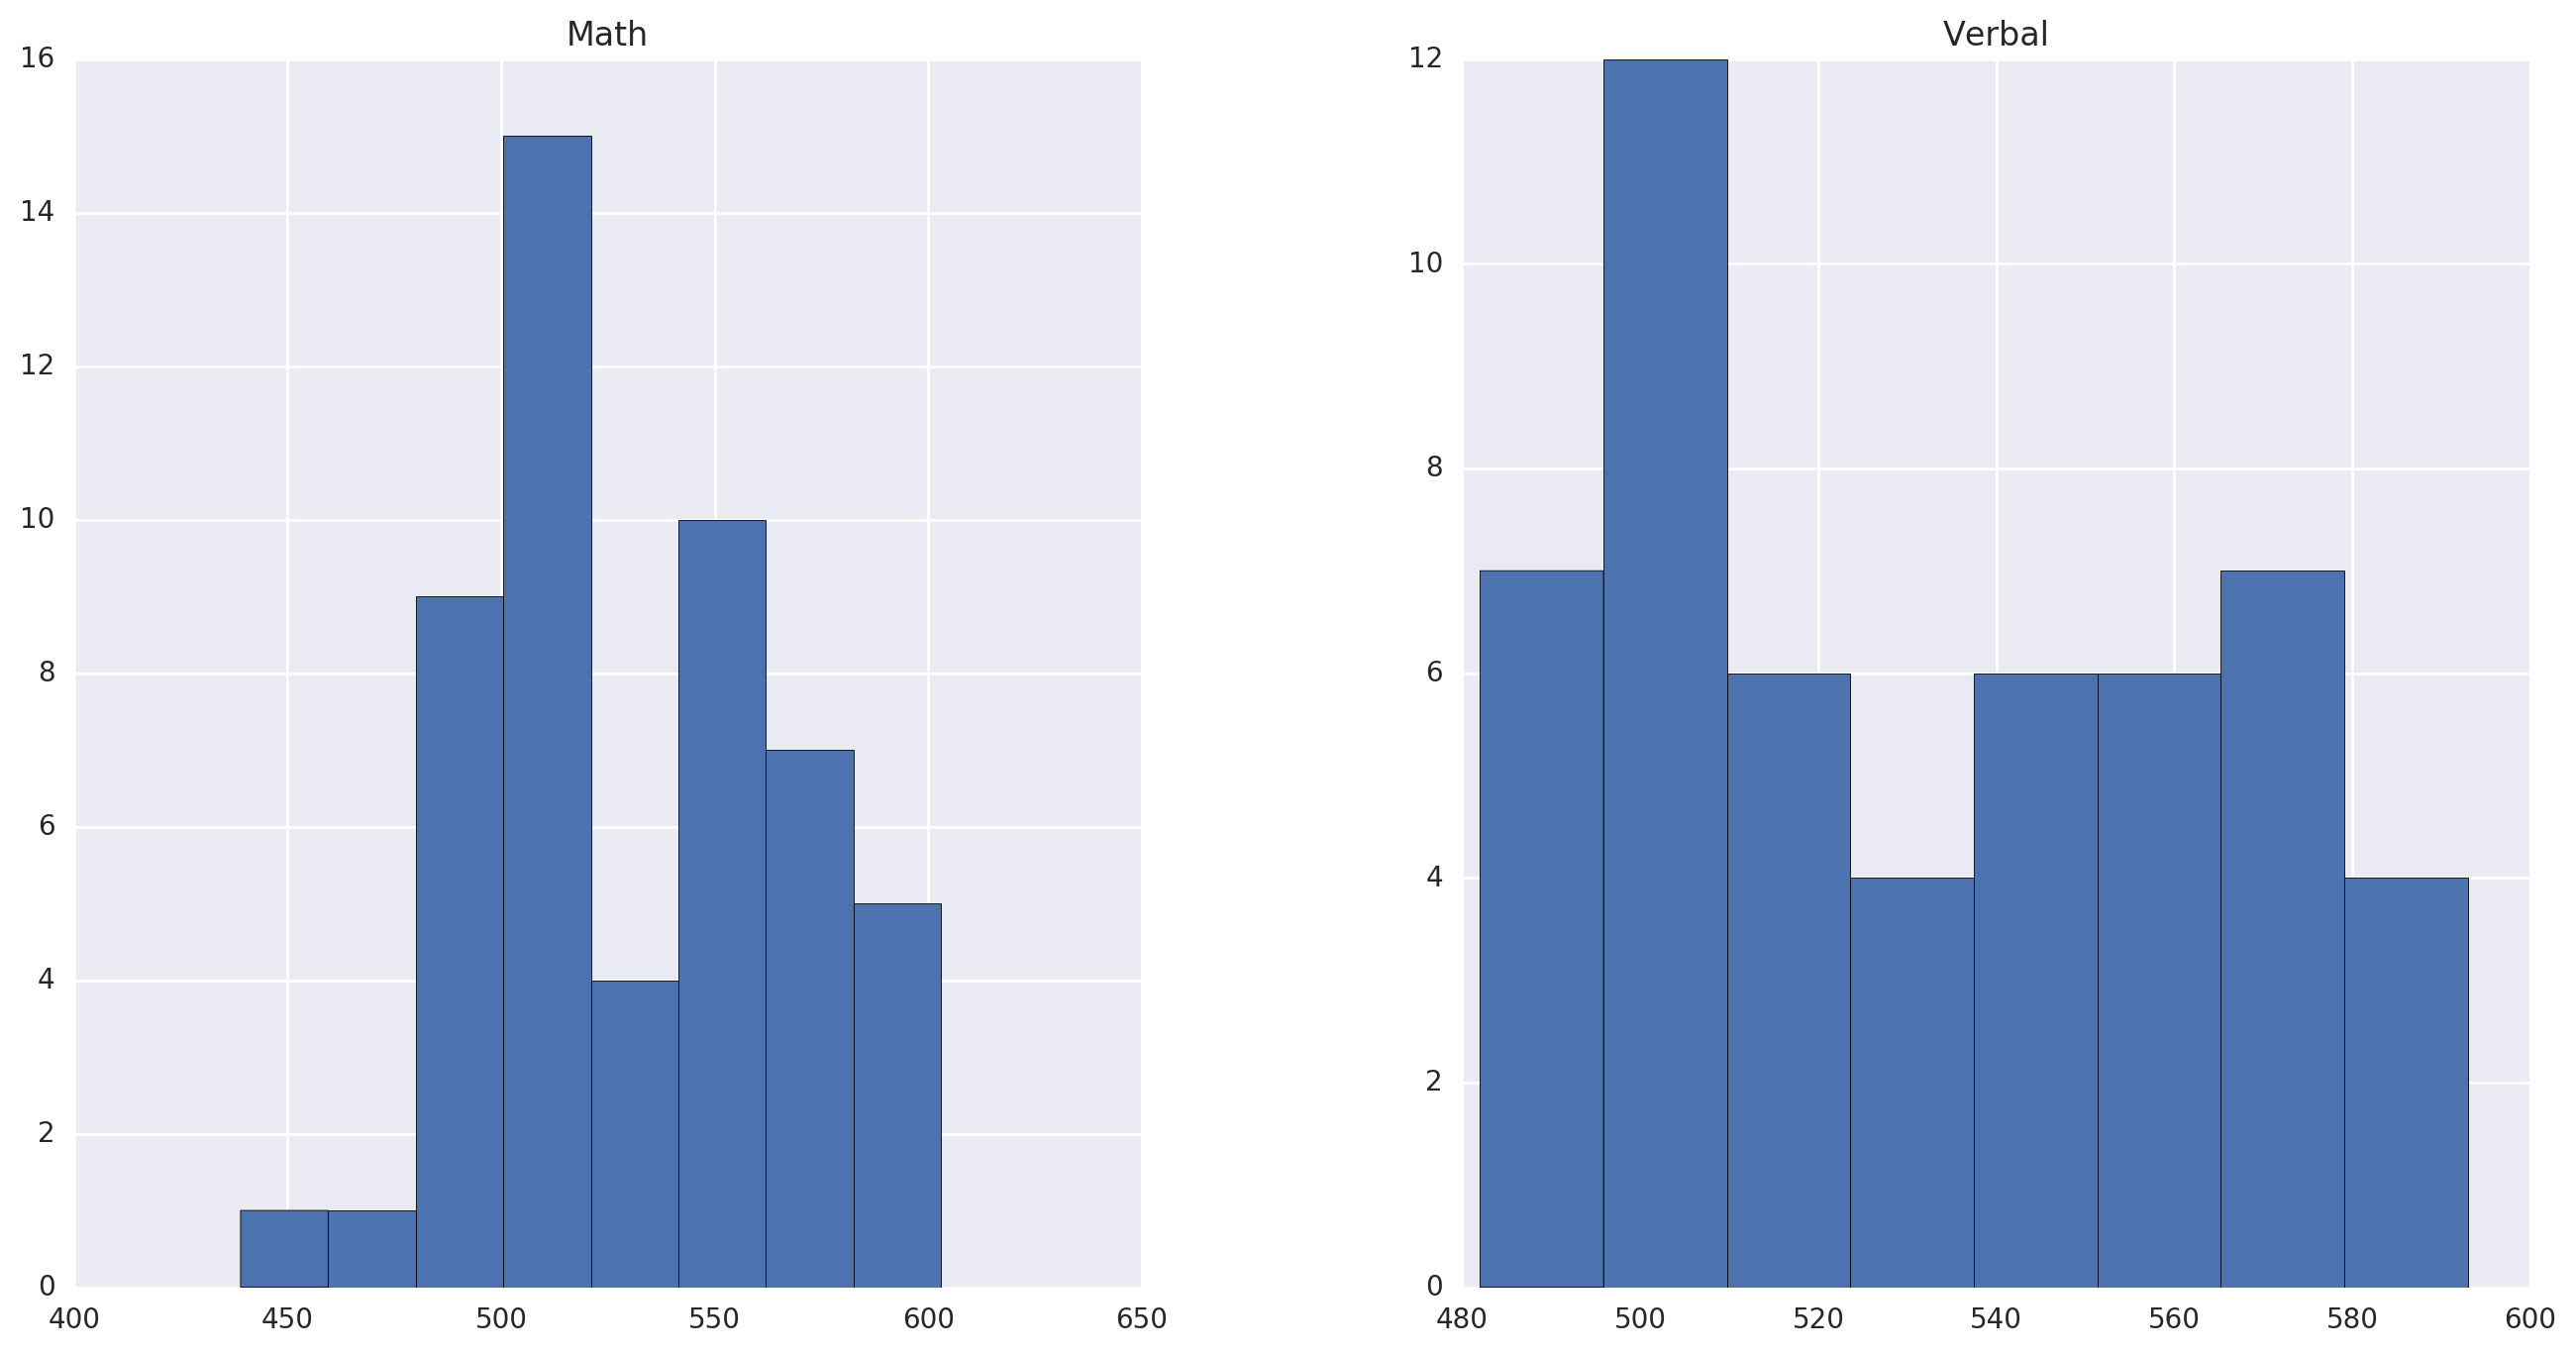

In [73]:
sat.hist(column=["Verbal", "Math"], figsize = (16, 8), bins = 8, color=("aqua"))

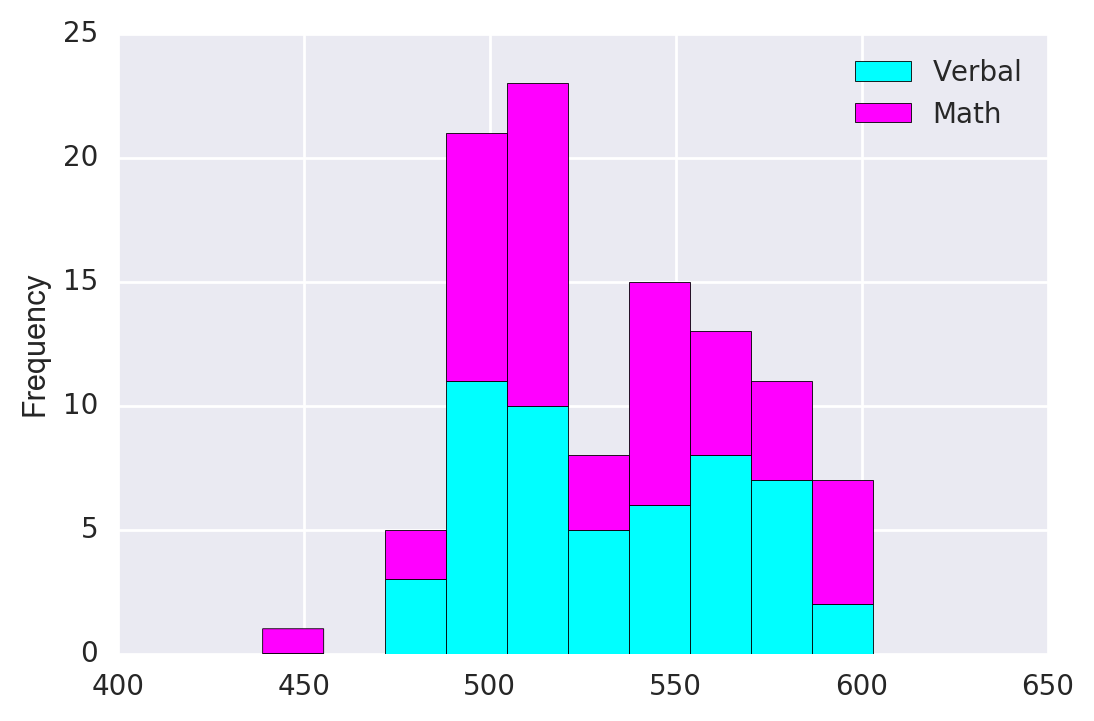

In [86]:
sat[["Verbal", "Math"]].plot(kind = "hist", stacked = True, color = ("aqua", "magenta"))

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

/Users/NVR/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  """Entry point for launching an IPython kernel.


{'boxes': [<matplotlib.lines.Line2D at 0x13022ec90>,
 'caps': [<matplotlib.lines.Line2D at 0x130244b90>,
 'fliers': [<matplotlib.lines.Line2D at 0x130226e90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x130226850>,
 'whiskers': [<matplotlib.lines.Line2D at 0x13022ee90>,
  <matplotlib.lines.Line2D at 0x1301e6190>]}

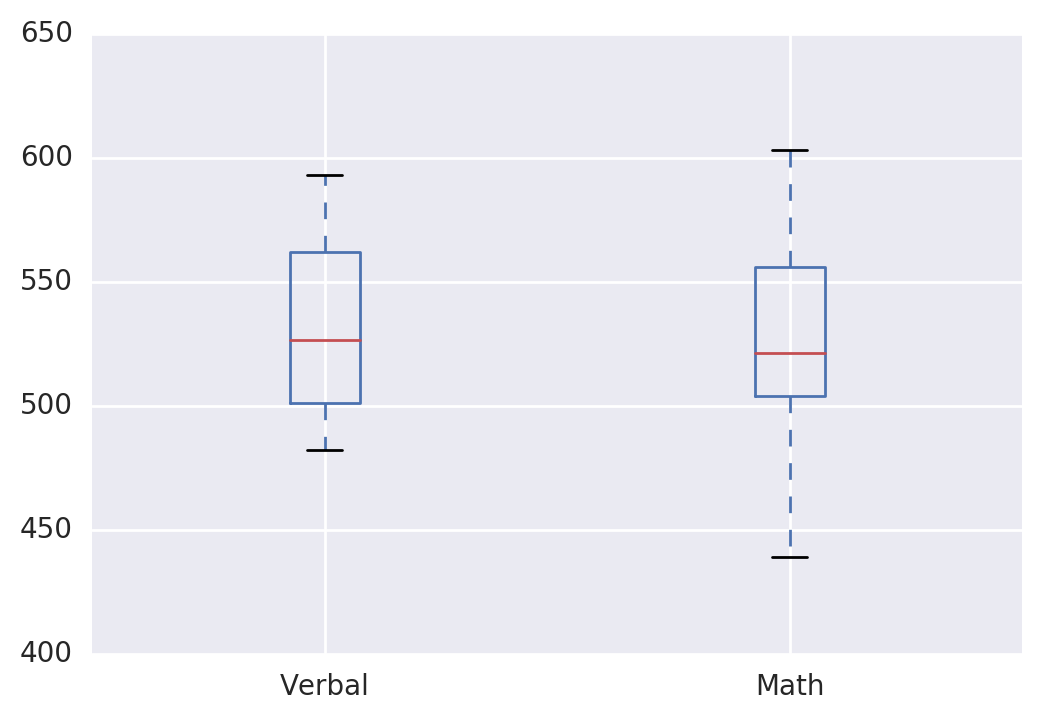

In [76]:
sat.boxplot(column=["Verbal", "Math"], figsize = (16, 8))

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [93]:

sat["Math_Norm"] = (sat.Math - sat.Math.mean()) / sat.Math.std()
sat["Verbal_Norm"] = (sat.Verbal - sat.Verbal.mean()) / sat.Verbal.std()
sat["Rate_Norm"] = (sat.Rate - sat.Rate.mean()) / sat.Rate.std()

In [94]:
sat.head()


,State,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm
0,CT,82,509,510,-0.596974,-0.692595,1.642609
1,NJ,81,499,513,-0.513675,-0.993471,1.605981
2,MA,79,511,515,-0.458143,-0.632419,1.532726
3,NY,77,495,505,-0.735805,-1.113822,1.459470
4,NH,72,520,516,-0.430377,-0.361630,1.276332


/Users/NVR/anaconda/envs/dsi/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


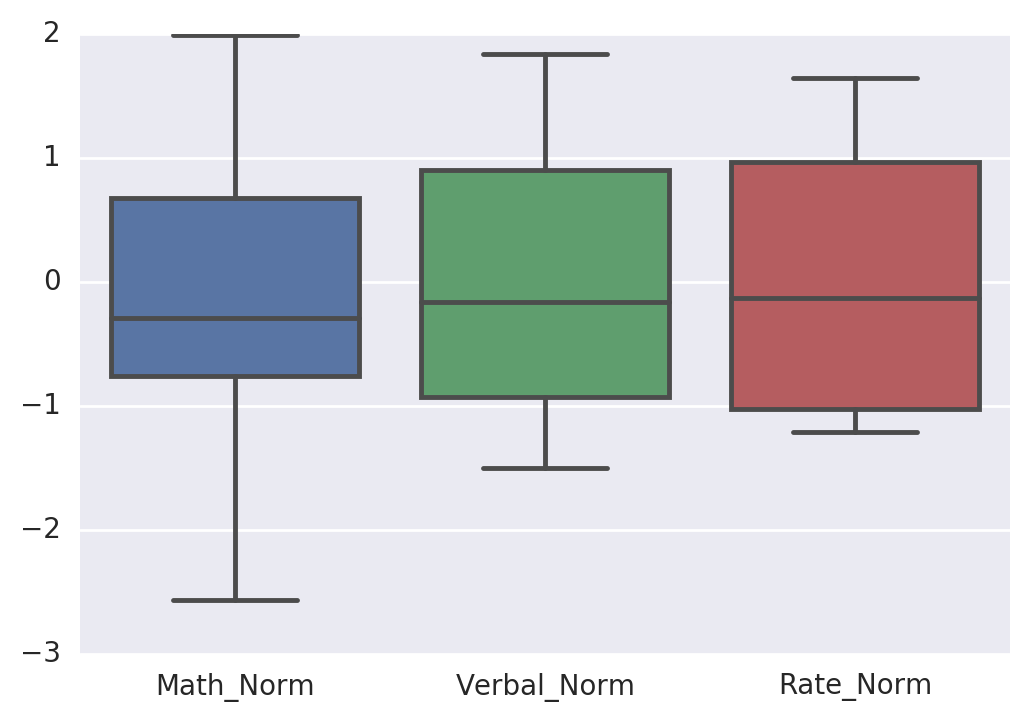

In [97]:
sns.boxplot(sat[["Math_Norm", "Verbal_Norm", "Rate_Norm"]])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [177]:
# iloc - indexing in pandas

sat.loc[sat.Verbal > sat.Verbal.mean()]


,State,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm,Verbal_Mean,returned_vals,Verbal-Math,Verbal_Math
26,CO,31,539,542,0.291545,0.210035,-0.225401,532.019231,False,3,-3
27,OH,26,534,439,-2.568376,0.059597,-0.408539,532.019231,False,-95,95
28,MT,23,539,539,0.208247,0.210035,-0.518422,532.019231,False,0,0
30,ID,17,543,542,0.291545,0.330386,-0.738188,532.019231,False,-1,1
31,TN,13,562,553,0.596974,0.902051,-0.884698,532.019231,False,-9,9
32,NM,13,551,542,0.291545,0.571087,-0.884698,532.019231,False,-9,9
33,IL,12,576,589,1.596558,1.323278,-0.921326,532.019231,False,13,-13
34,KY,12,550,550,0.513675,0.540999,-0.921326,532.019231,False,0,0
35,WY,11,547,545,0.374844,0.450736,-0.957954,532.019231,False,-2,2
36,MI,11,561,572,1.124532,0.871963,-0.957954,532.019231,False,11,-11


In [178]:
sat.loc[sat.Verbal > sat.Verbal.mean(), "State"]

26    CO
27    OH
28    MT
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [179]:
sat.loc[sat.Verbal > sat.Verbal.median(), "State"]

19    WA
26    CO
27    OH
28    MT
29    WV
30    ID
31    TN
32    NM
33    IL
34    KY
35    WY
36    MI
37    MN
38    KS
39    AL
40    NE
41    OK
42    MO
43    LA
44    WI
45    AR
46    UT
47    IA
48    SD
49    ND
50    MS
Name: State, dtype: object

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [183]:
sat["Verbal_Math"] = sat["Verbal"] - sat["Math"]

sat.head(3)

,State,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm,Verbal_Mean,returned_vals,Verbal-Math,Verbal_Math
0,CT,82,509,510,-0.596974,-0.692595,1.642609,532.019231,True,1,-1
1,NJ,81,499,513,-0.513675,-0.993471,1.605981,532.019231,True,14,-14
2,MA,79,511,515,-0.458143,-0.632419,1.532726,532.019231,True,4,-4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [184]:
verbal_10g = sat.sort_values("Verbal_Math", ascending = False).iloc[0:10, :]
verbal_10l = sat.sort_values("Verbal_Math", ascending = True).iloc[0:10, :]

In [185]:
print verbal_10g.head(3)
print verbal_10l.head(3)

   State  Rate  Verbal  Math  Math_Norm  Verbal_Norm  Rate_Norm  Verbal_Mean  \
27    OH    26     534   439  -2.568376     0.059597  -0.408539   532.019231   
50    MS     4     566   551   0.541441     1.022402  -1.214347   532.019231   
29    WV    18     527   512  -0.541441    -0.151017  -0.701560   532.019231   

   returned_vals  Verbal-Math  Verbal_Math  
27         False          -95           95  
50         False          -15           15  
29          True          -15           15  
   State  Rate  Verbal  Math  Math_Norm  Verbal_Norm  Rate_Norm  Verbal_Mean  \
21    HI    52     485   515  -0.458143    -1.414698   0.543780   532.019231   
23    CA    51     498   517  -0.402610    -1.023559   0.507152   532.019231   
1     NJ    81     499   513  -0.513675    -0.993471   1.605981   532.019231   

   returned_vals  Verbal-Math  Verbal_Math  
21          True           30          -30  
23          True           19          -19  
1           True           14          -14 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [186]:
sat[["Verbal", "Math", "Rate", "Verbal_Math"]].corr()

,Verbal,Math,Rate,Verbal_Math
Verbal,1.000000,0.899871,-0.886432,0.052600
Math,0.899871,1.000000,-0.773746,-0.388219
Rate,-0.886432,-0.773746,1.000000,-0.101412
Verbal_Math,0.052600,-0.388219,-0.101412,1.000000


In [187]:
sat.describe()

,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm,Verbal_Mean,Verbal-Math,Verbal_Math
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000
mean,37.153846,532.019231,531.500000,-2.135044e-18,1.558582e-15,2.167070e-16,5.320192e+02,-0.519231,0.519231
std,27.301788,33.236225,36.014975,1.000000e+00,1.000000e+00,1.000000e+00,1.147960e-13,15.729939,15.729939
min,4.000000,482.000000,439.000000,-2.568376e+00,-1.504961e+00,-1.214347e+00,5.320192e+02,-95.000000,-30.000000
25%,9.000000,501.000000,504.000000,-7.635713e-01,-9.332958e-01,-1.031209e+00,5.320192e+02,-4.250000,-6.000000
50%,33.500000,526.500000,521.000000,-2.915454e-01,-1.660607e-01,-1.338318e-01,5.320192e+02,0.000000,0.000000
75%,63.500000,562.000000,555.750000,6.733310e-01,9.020510e-01,9.649974e-01,5.320192e+02,6.000000,4.250000
max,82.000000,593.000000,603.000000,1.985285e+00,1.834768e+00,1.642609e+00,5.320192e+02,30.000000,95.000000


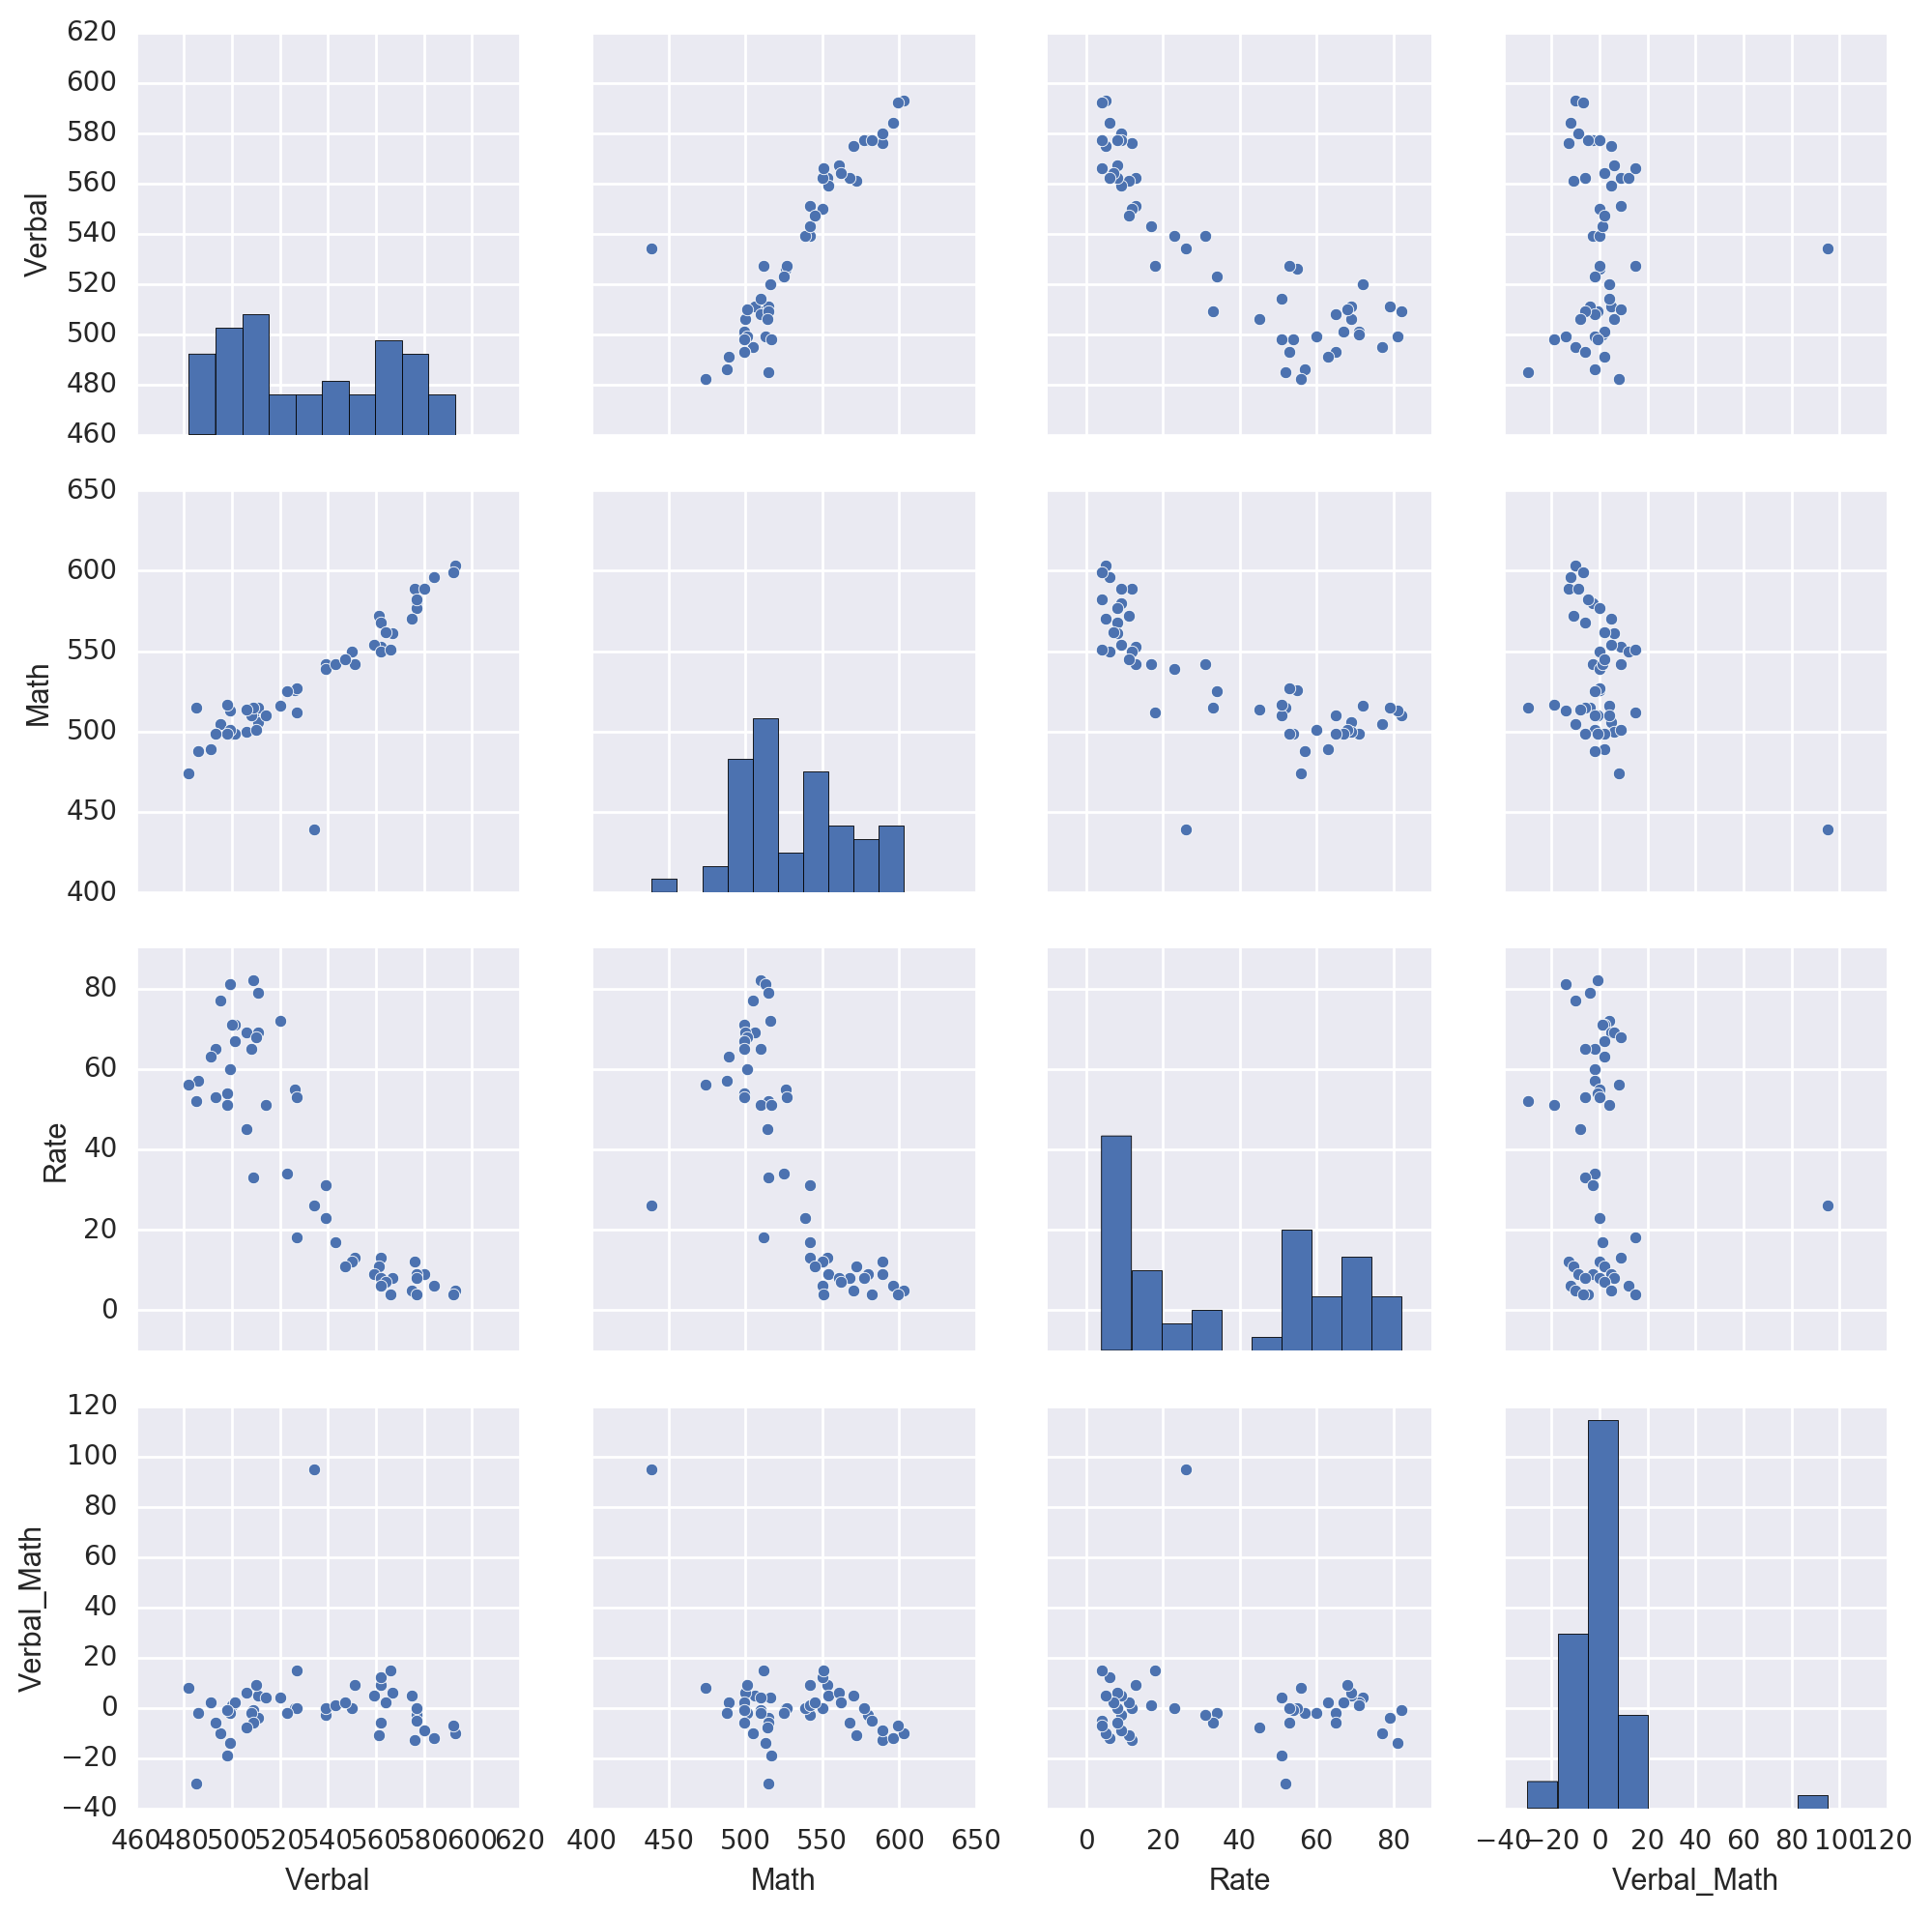

In [191]:
sns.pairplot(sat[["Verbal", "Math", "Rate", "Verbal_Math"]])

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [192]:
sat.describe()

,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm,Verbal_Mean,Verbal-Math,Verbal_Math
count,52.000000,52.000000,52.000000,5.200000e+01,5.200000e+01,5.200000e+01,5.200000e+01,52.000000,52.000000
mean,37.153846,532.019231,531.500000,-2.135044e-18,1.558582e-15,2.167070e-16,5.320192e+02,-0.519231,0.519231
std,27.301788,33.236225,36.014975,1.000000e+00,1.000000e+00,1.000000e+00,1.147960e-13,15.729939,15.729939
min,4.000000,482.000000,439.000000,-2.568376e+00,-1.504961e+00,-1.214347e+00,5.320192e+02,-95.000000,-30.000000
25%,9.000000,501.000000,504.000000,-7.635713e-01,-9.332958e-01,-1.031209e+00,5.320192e+02,-4.250000,-6.000000
50%,33.500000,526.500000,521.000000,-2.915454e-01,-1.660607e-01,-1.338318e-01,5.320192e+02,0.000000,0.000000
75%,63.500000,562.000000,555.750000,6.733310e-01,9.020510e-01,9.649974e-01,5.320192e+02,6.000000,4.250000
max,82.000000,593.000000,603.000000,1.985285e+00,1.834768e+00,1.642609e+00,5.320192e+02,30.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [193]:
outlier_mask = (sat.Verbal_Math == sat.Verbal_Math.max())
outlier_state = sat.loc[outlier_mask,  :]

outlier_state

,State,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm,Verbal_Mean,returned_vals,Verbal-Math,Verbal_Math
27,OH,26,534,439,-2.568376,0.059597,-0.408539,532.019231,False,-95,95


In [195]:
sat_nooutlier = sat.loc[sat.State != "OH", :]


In [196]:
sat_nooutlier.corr()

,Rate,Verbal,Math,Math_Norm,Verbal_Norm,Rate_Norm,Verbal_Mean,returned_vals,Verbal-Math,Verbal_Math
Rate,1.000000e+00,-8.874587e-01,-8.543822e-01,-8.543822e-01,-8.874587e-01,1.000000e+00,-8.178520e-17,9.029671e-01,9.932991e-02,-9.932991e-02
Verbal,-8.874587e-01,1.000000e+00,9.691259e-01,9.691259e-01,1.000000e+00,-8.874587e-01,-5.365791e-16,-9.099372e-01,-8.607857e-02,8.607857e-02
Math,-8.543822e-01,9.691259e-01,1.000000e+00,1.000000e+00,9.691259e-01,-8.543822e-01,-1.660761e-15,-8.804821e-01,1.622302e-01,-1.622302e-01
Math_Norm,-8.543822e-01,9.691259e-01,1.000000e+00,1.000000e+00,9.691259e-01,-8.543822e-01,3.504625e-17,-8.804821e-01,1.622302e-01,-1.622302e-01
Verbal_Norm,-8.874587e-01,1.000000e+00,9.691259e-01,9.691259e-01,1.000000e+00,-8.874587e-01,3.265478e-17,-9.099372e-01,-8.607857e-02,8.607857e-02
Rate_Norm,1.000000e+00,-8.874587e-01,-8.543822e-01,-8.543822e-01,-8.874587e-01,1.000000e+00,-3.314434e-16,9.029671e-01,9.932991e-02,-9.932991e-02
Verbal_Mean,-8.178520e-17,-5.365791e-16,-1.660761e-15,3.504625e-17,3.265478e-17,-3.314434e-16,1.000000e+00,2.274944e-16,3.984391e-17,-3.984391e-17
returned_vals,9.029671e-01,-9.099372e-01,-8.804821e-01,-8.804821e-01,-9.099372e-01,9.029671e-01,2.274944e-16,1.000000e+00,8.382817e-02,-8.382817e-02
Verbal-Math,9.932991e-02,-8.607857e-02,1.622302e-01,1.622302e-01,-8.607857e-02,9.932991e-02,3.984391e-17,8.382817e-02,1.000000e+00,-1.000000e+00
Verbal_Math,-9.932991e-02,8.607857e-02,-1.622302e-01,-1.622302e-01,8.607857e-02,-9.932991e-02,-3.984391e-17,-8.382817e-02,-1.000000e+00,1.000000e+00


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [205]:
# again dataset location might be different on your computer
drug_data_filepath = '~nvr/desktop/dsi-sf-7-materials-nvr/datasets/drug_use_by_age/drug-use-by-age.csv'

In [206]:
drugs = pd.read_csv(drug_data_filepath)

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [207]:
drugs.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [211]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

In [ ]:
def not_num(x):
    

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 



<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring 

---

### 10.1 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.

### 10.2 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.